# Assignment 3 (Course "Researach Track 2" at UniGe, Italy)

### Changes made to the assignment submitted as part of course of "research track 1"

1. The robot can now robustly and in real-time, determine if all the tokens have been reached, without having to previously state how many tokens are present in the environment.

2. The assignment implementation has been subjected to stringent evaluation for failure, which includes the distance between, or the orientation difference between the tokens which have been paired (delivered) - even very small differences in the implementation A are treated as failure.

3. The implementation can now detect if the robot got stuck in a loop while searching for tokens and can break out of the loop, denoting a failure.

4. It is also possible to detect if the robot got stuck in a loop while delivering tokens and can break out of the loop, denoting a failure.

5. A new function to randomize the tokens in the original circles has been implementation to provide a "randomized environment" for performing tests. The function is presented below:
    ```python
    def place_token_random(radius, max_a=2*pi, number_offset=0):
        token_type = SilverToken if radius == INNER_CIRCLE_RADIUS else GoldToken
        rotation_amount = 0
        for i in range(TOKENS_PER_CIRCLE):
            token = token_type(self, number_offset + i)
            angle = random.uniform(0, max_a)
            token.location = (cos(angle) * radius, sin(angle) * radius)
            token.heading = rotation_amount
            self.objects.append(token)
    ```
    The function is simply called as follows:
    ```python
        place_token_random(INNER_CIRCLE_RADIUS)
        place_token_random(OUTER_CIRCLE_RADIUS, number_offset=TOKENS_PER_CIRCLE)
    ```
6. In the main algorithm file (assignment.py) a few changes were made to write the data to a file `execution_times.csv` file as soon as either the task was completed or a failure was detected. Times were calculated by using the `time.time()` function in different places. The function to write the data is presented below:
    ```python
    def write_execution_times(exec_time):
        """
        Function to write the execution times to a csv file.
        Args: exec_time(float): Execution time of the program.
        """
        file_path = os.path.abspath('execution_times.csv')
        file_exists = os.path.isfile(file_path)

        with open(file_path, 'a') as csvfile:
            writer = csv.writer(csvfile)
            if not file_exists:
                writer.writerow(["Execution Time"])
            # Write the execution time for this run
            writer.writerow([exec_time])
    ```
7. A new python script `analyze.py` was created to automate the process of running multiple instances of the assignment in parallel, for faster collection of data. The script can be run by a command, whose usage is presented below:
    ```bash
    usage: python analyze.py [-h] [-b BATCHES] [-r REPS] [-m METRICS_INTERVAL]

    Run the simulation batches with specified repititions, and calculate various
    metrics associated with the simulation of the game.

    optional arguments:
    -h, --help            show this help message and exit
    -b BATCHES, --batches BATCHES
                            Number of batches to run the simulation for.
    -r REPS, --reps REPS  Number of repititions of sim per batch.
    -m METRICS_INTERVAL, --metrics_interval METRICS_INTERVAL
                            Number of batches after which to calculate metrics.
    ```

In my study, I aimed to compare the performances of different implementations of the **Assignment 1** of the course: ***Research Track 1***, specifically, implementations `A` (self-made), `K` (by a colleague [here](https://github.com/kazu610/3rd_assignment_RT2)), and `L` (by another colleague [here](https://github.com/Lucas-Pardo/RT2_Assignment_3)), based on their execution times and success rates. At a time, implementation A is either compared with K or L, for evaluating differnt results. The results are presented in the following sections.

##### Hypotheses presented (stated crudely, formally stated in the following sections):
1. Whether Implementation A and Implementation K have different execution times, specifically if Implementation A is faster.
2. Whether Implementation A and Implementation L differ in their success rates, specifically if Implementation A has a lower success rate.

##### Data Collection:
1. The data of **30** successful runs in randomized environment was collected for both implementations A and K after formulating the hypothesis 1, and the execution times were recorded in the files `data/ImplementationK/randomenv_exec_timesA.csv` and `data/ImplementationK/randomenv_exec_timesK.csv`.
2. The data of **100** runs in randomized environment was collected for both implementations L and A after formulating the hypothesis 2, and the execution times were recorded in the files `data/ImplementationL/random_10.txt` and `data/ImplementationA/execution_times_randomized_env.csv`.

In the statistical analyses conducted below, I adopt a significance level (alpha) of 0.05. This signifies that I'd be willing to accept a 5% risk of incorrectly rejecting the null hypothesis if it were indeed true (Type I error). 

Consequently, any p-value equal to or smaller than 0.05 provides sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis.

To perform some standardized tests in statictics, I chose the python library `scipy.stats` which provides a wide range of statistical tests and functions. The documentation for the library can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [27]:
import os
import numpy
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Hypothesis 1:

Let $μ_A$ denote the mean execution time of Implementation A, and let $μ_K$ denote the mean execution time of Implementation K.

1. **Null Hypothesis (H0):** There is no difference in the mean execution times of the two implementations. Formally, $μ_A = μ_K$.

2. **Alternative Hypothesis (H1):** The mean execution time of Implementation A is less than that of Implementation K. Formally, $μ_A < μ_K$.

##### Load Data for testing hypothesis 1:

Data for implementations `A` and `K` were collected after running them in parallel for required number of times, and getting 30 successful runs. (By successful runs, we mean that the robot was able to deliver all the tokens to their respective gold tokens, without getting stuck in a loop, or without failing to reach any token.)

In [28]:
# Load data
current_dir = os.getcwd()
path_dataK = os.path.join(current_dir, 'data', 'ImplementationK', 'randomenv_exec_timesK.csv')
path_dataA = os.path.join(current_dir, 'data', 'ImplementationK', 'randomenv_exec_timesA.csv')
exec_timesK = numpy.loadtxt(path_dataK, delimiter=',', skiprows=1)
exec_timesA = numpy.loadtxt(path_dataA, delimiter=',', skiprows=1)

print("Exec Times A: ", exec_timesA, "\n")
print("Exec Times K: ", exec_timesK)

Exec Times A:  [37.77668095 44.46400499 46.03198314 48.29454112 52.03829789 52.49213696
 53.23186183 58.21002698 60.60602117 38.69818592 44.10883617 46.81135011
 48.26659417 48.57106709 48.82675385 51.3419888  35.30833578 39.20498109
 40.11223507 41.75994897 41.95576787 46.69194889 51.07402396 55.39902592
 38.0034678  38.56418085 40.00610495 42.24549413 52.92601895 54.50770593] 

Exec Times K:  [ 92.46227002  97.73628497  98.43292904 102.74572396 102.78263998
 103.96677399 106.22474217 109.98327923 112.4817009  114.29829097
 113.56836295 113.71793604 114.49517894 116.24606919 117.54107499
 119.26594591 120.08769798 121.99174118 123.00483704 123.31274796
 125.65598512 125.45696402 127.80762506 128.30329585 136.83233404
 141.80344486 145.60325098 147.01184607 154.07681584 170.03156209]


#### Visualiaze data:

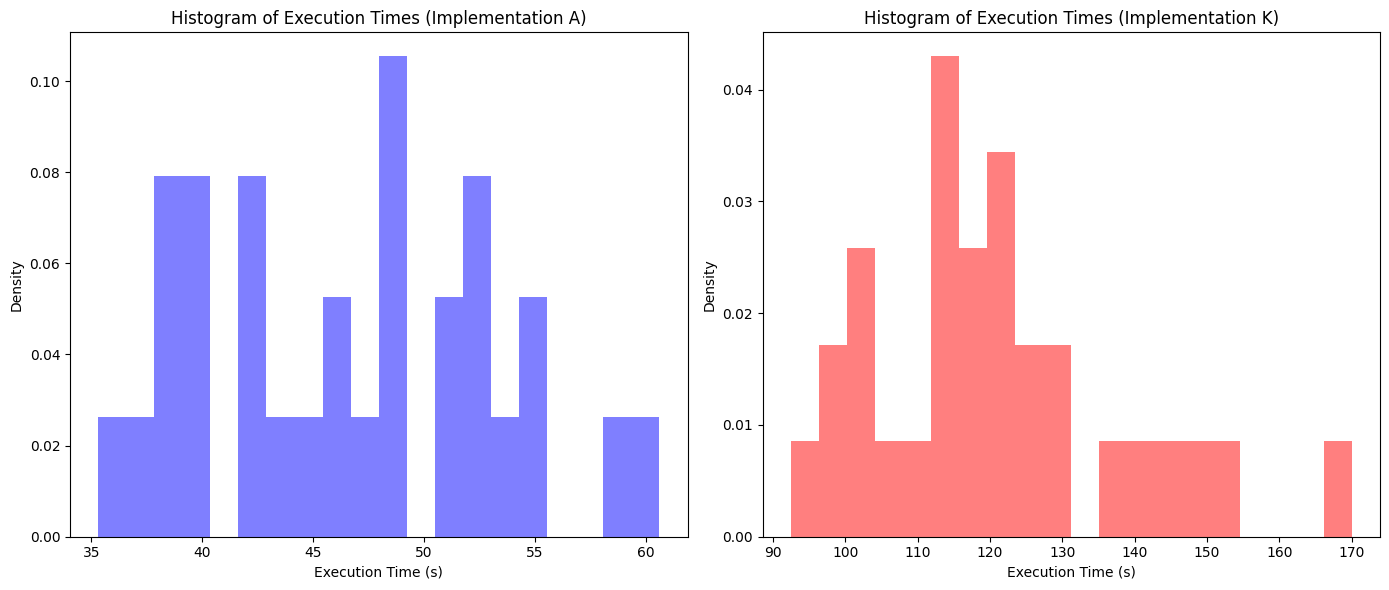

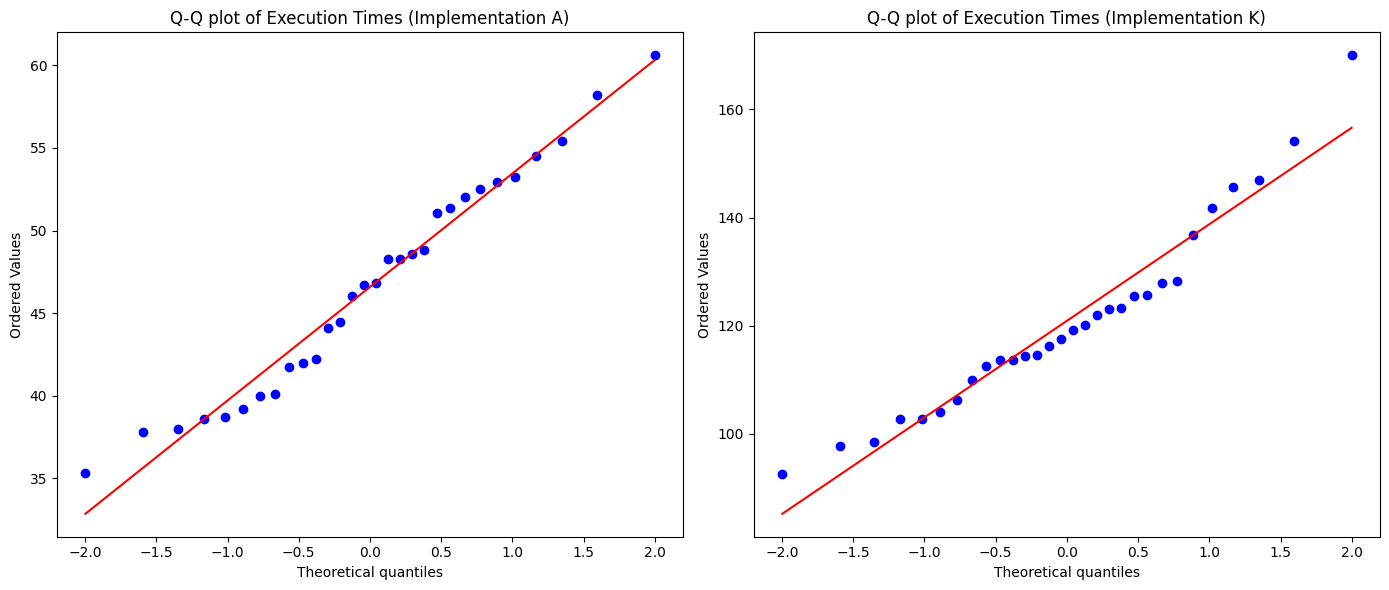

In [29]:
import scipy.stats as stats

# Histograms
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(exec_timesA, bins=20, alpha=0.5, color='blue', density=True)
plt.title('Histogram of Execution Times (Implementation A)')
plt.xlabel('Execution Time (s)')
plt.ylabel('Density')

plt.subplot(1,2,2)
plt.hist(exec_timesK, bins=20, alpha=0.5, color='red', density=True)
plt.title('Histogram of Execution Times (Implementation K)')
plt.xlabel('Execution Time (s)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Q-Q plots
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
stats.probplot(exec_timesA, plot=plt)
plt.title('Q-Q plot of Execution Times (Implementation A)')

plt.subplot(1,2,2)
stats.probplot(exec_timesK, plot=plt)
plt.title('Q-Q plot of Execution Times (Implementation K)')

plt.tight_layout()
plt.show()

A nice thing to notice here is the use of the Q-Q plot, or "Quantile-Quantile" plot. It is a powerful tool to visualize the distribution of a sample of data by comparing it to a known distribution (theoretical distribution). The points in the plot are plotted in such a way that the points should form a straight line. If the points are not on a straight line, then the distribution of the sample data does not match the theoretical distribution - the normal distribution in our case. The Q-Q plot is a good way to see if the data is normally distributed or not.

We can clearly notice that the blue points are roughly along the red line, which means that the data is normally distributed.

#### Check normality of data using the **Shapiro-Wilk** test:

In [30]:
from scipy.stats import shapiro

# test for normality
stat, p_value = shapiro(exec_timesA)

# interpret
alpha = 0.05
if p_value > alpha:
    print('Sample A looks Gaussian (fail to reject H0)')
else:
    print('Sample A does not look Gaussian (reject H0)')

Sample A looks Gaussian (fail to reject H0)


In [31]:
from scipy.stats import shapiro

# test for normality
stat, p_value = shapiro(exec_timesK)

# interpret
alpha = 0.05
if p_value > alpha:
    print('Sample K looks Gaussian (fail to reject H0)')
else:
    print('Sample K does not look Gaussian (reject H0)')

Sample K looks Gaussian (fail to reject H0)


Mean difference: -74.3133260011673
Standard deviation of differences: 18.879393412129556


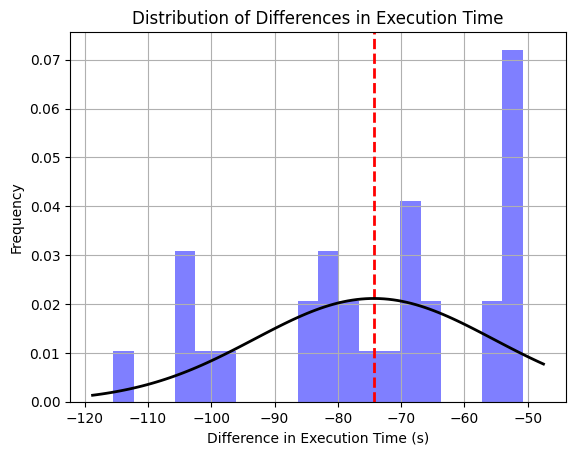

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Compute differences
differences = exec_timesA - exec_timesK

# Computing mean difference
mean_diff = numpy.mean(differences)

# Computing standard deviation of differences
std_dev_diff = numpy.std(differences)

# Print results
print("Mean difference: " + str(mean_diff))
print("Standard deviation of differences: " + str(std_dev_diff))

# Plot histogram of differences
plt.hist(differences, bins=20, alpha=0.5, color='blue', density=True)
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=2)  # Mean difference

# Plot the normal distribution fit
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_diff, std_dev_diff)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Difference in Execution Time (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Differences in Execution Time')
plt.grid(True)
plt.show()

### Testing the First Hypothesis:

#### Standard Procedure for paired T-test:

1. Define the null hypothesis ($H_0$) as there being no difference in the average execution times between implementations A and K. The alternative hypothesis ($H_A$) states that the average execution time for implementation A is less than that for implementation K.

2. Calculate the differences between the paired observations. Let $X_i$ and $Y_i$ be the execution times of implementations A and K respectively for the same task. Then compute the differences, $D_i = X_i - Y_i$ for all tasks.

3. Compute the sample mean ($\overline{D}$) and standard deviation (s) of the differences. $\overline{D}$ is given by $\frac{\sum D_i}{n}$ and s is calculated by $\sqrt{\frac{\sum (D_i - \overline{D})^2}{n-1}}$.

4. Compute the test statistic (t-statistic) using the formula: $t = \frac{\overline{D}}{s / \sqrt{n}}$, where n is the number of paired samples.

5. Calculate the p-value using the computed t-statistic and degrees of freedom (n-1). Use a one-tailed test in this case, so if the calculated t-statistic is negative, halve the p-value to get a one-tailed p-value.

6. Compare the calculated p-value with the significance level (α = 0.05). If the p-value is less than or equal to α, reject the null hypothesis, providing evidence for the alternative hypothesis.

Most of this work is made easy by using the scipy library in python. The function `scipy.stats.ttest_rel()` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)) was used to perform the paired t-test. The function returns the t-statistic and the p-value.

In [33]:
# Paired t-test

# Calculate t-statistic
t_statistic, p_value_two_tailed = scipy.stats.ttest_rel(exec_timesA, exec_timesK)

# Convert two-tailed p-value to one-tailed (only when the t-statistic is negative)
if t_statistic < 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - p_value_two_tailed / 2

# Print results
print("t-statistic: " + str(t_statistic))
print("one-tailed p-value: " + str(p_value_one_tailed))

t-statistic: -21.19715920668762
one-tailed p-value: 1.688524508022901e-19


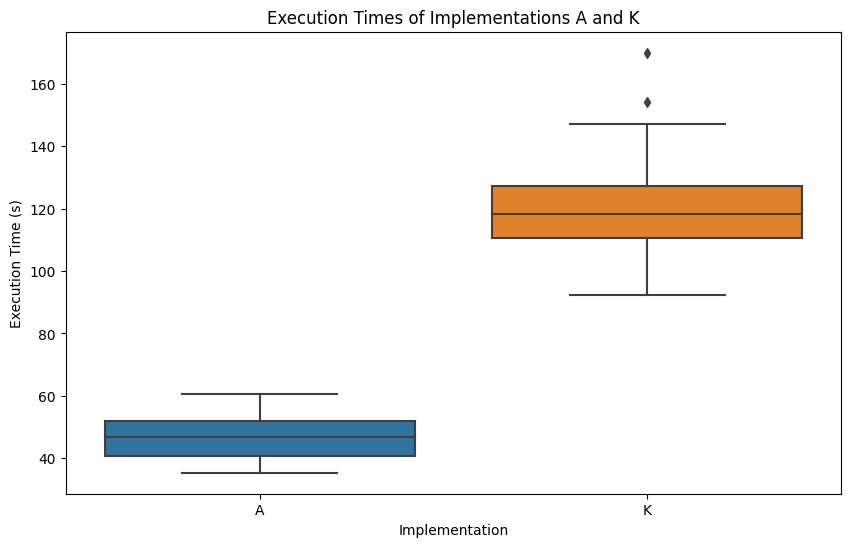

In [34]:
# Load data into Pandas DataFrames
df_A = pd.DataFrame(exec_timesA, columns=["Execution Time"])
df_A['Implementation'] = 'A'
df_K = pd.DataFrame(exec_timesK, columns=["Execution Time"])
df_K['Implementation'] = 'K'

# Concatenate the dataframes
df = pd.concat([df_A, df_K])

# Create a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="Implementation", y="Execution Time", data=df)

plt.title('Execution Times of Implementations A and K')
plt.ylabel('Execution Time (s)')
plt.xlabel('Implementation')
plt.show()

My 'analysis' question was to determine whether the execution time for Algorithm A was faster than Algorithm K.

I collected data on the execution times for both algorithms on randomized arena with 6 tokens and performed a one-tailed paired t-test on the data. This type of test was chosen because it allows us to compare the means of the same group or item under two separate scenarios (running Algorithm A and Algorithm K).

The result of the t-test yielded a t-statistic of -21.20 and a one-tailed p-value of approximately 1.69e-19. In statistical terms, a p-value less than 0.05 typically indicates strong evidence against the null hypothesis. Therefore, I reject my null hypothesis and conclude that there is significant evidence to suggest that Algorithm A has faster execution times than Algorithm K.

These results indicate that, under the conditions of my testing environment, Implementation A performs faster than Implementation K.

### Summarizing:

After performing a paired t-test, the results were a t-statistic of -21.20 and a one-tailed p-value close to zero. This provides strong statistical evidence suggesting that Implementation A has faster execution times than Implementation K.


## Hypothesis 2:

Let $p_A$ denote the success rate of Implementation A, and let $p_L$ denote the success rate of Implementation L. 

1. **Null Hypothesis (H0):** There is no difference in the success rates of the two algorithms. Formally, $p_A = p_L$.

2. **Alternative Hypothesis (H1):** Implementation A has a lower success rate than Implementation L. Formally, $p_A < p_L$.

##### Load Data for testing hypothesis 2:

In [35]:
path_dataL = os.path.join(current_dir, 'data', 'ImplementationL', 'random_10.txt')

# Define a custom converter that sets values with -1 inactivity to 90
def custom_converter(val):
    exec_time, inactivity = val.decode().split(',')
    return float(exec_time) if float(inactivity) != -1 else 90

# Use genfromtxt to read the data
exec_timesL = numpy.genfromtxt(path_dataL, delimiter='\n', skip_header=1, converters={0: custom_converter})
print("Exec Times L: ", exec_timesL, "\n")

path_dataA = os.path.join(current_dir, 'data', 'ImplementationA', 'execution_times_randomized_env.csv')
exec_timesA = numpy.loadtxt(path_dataA, delimiter=',', skiprows=1)

print("Exec Times A: ", exec_timesA)

Exec Times L:  [90 41 90 42 90 62 36 33 37 90 37 37 42 90 37 45 37 51 90 90 90 35 35 59
 36 90 90 40 45 90 39 90 37 36 70 37 32 39 38 43 39 36 43 56 43 31 45 39
 37 55 40 40 90 44 50 90 40 90 42 45 50 90 90 54 34 90 36 42 41 37 49 90
 90 38 90 90 36 90 43 41 90 48 32 90 36 42 90 29 37 40 90 38 43 90 35 37
 32 90 90 38] 

Exec Times A:  [100.         100.          36.9397788   38.71880174 100.
 100.         100.          41.61794806  90.          49.820611
  49.98059797  90.         100.          51.29700494  52.89022517
  90.          90.          90.          62.41436982  90.
  90.          90.          90.          90.          90.
 100.         100.         100.          35.89996815  40.36427188
  40.88834     42.17392516  44.22261906  44.37859607  46.9071939
  90.          49.3416667   90.          90.          51.0907321
 100.          53.96831298  90.          90.          56.71946406
  90.          90.          90.          90.          90.
 100.         100.         100.       

Note here that in both the data of `A` and `L` a value of 90, 100 or 110 would indicate a failure. This is the just the way we have implemented our algorithm.

#### Visuliaze data:

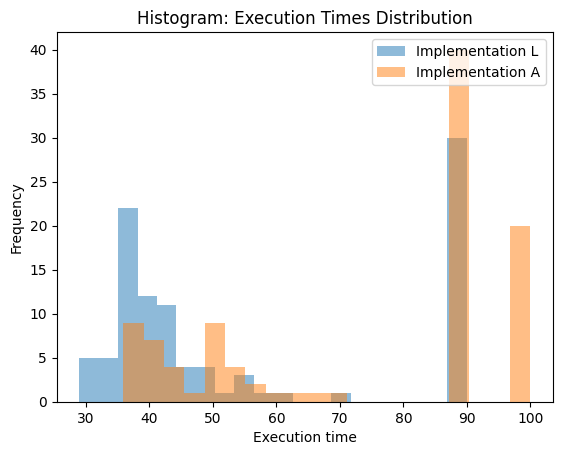

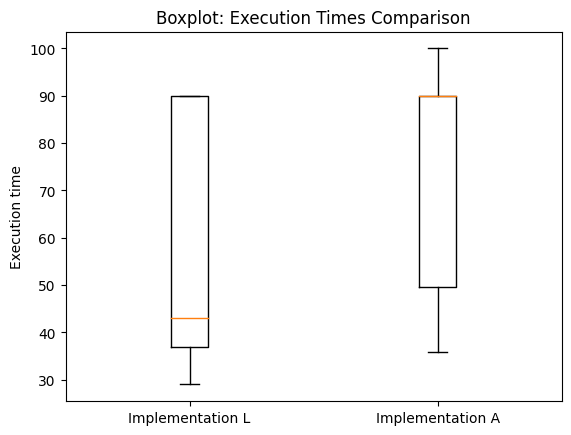

In [36]:
import matplotlib.pyplot as plt

# Histogram for Implementation L
plt.hist(exec_timesL, bins=20, alpha=0.5, label='Implementation L')
# Histogram for Implementation A
plt.hist(exec_timesA, bins=20, alpha=0.5, label='Implementation A')

# Set graph labels and title
plt.xlabel('Execution time')
plt.ylabel('Frequency')
plt.title('Histogram: Execution Times Distribution')
plt.legend(loc='upper right')

# Display the graph
plt.show()

# Using a Boxplot for comparison!
plt.boxplot([exec_timesL, exec_timesA], labels=['Implementation L', 'Implementation A'])
plt.title('Boxplot: Execution Times Comparison')
plt.ylabel('Execution time')
plt.show()


A boxplot used here provides a quick and visually intuitive way to compare the distributions of the times across the two implementations A and L.

#### Binomial Assumption Check:

In [37]:
# Calculate the success rates for algorithm A and L
success_rate_A = numpy.sum(exec_timesA < 90) / len(exec_timesA)
success_rate_L = numpy.sum(exec_timesL < 90) / len(exec_timesL)

# Check if np and n(1-p) are greater than 5
if len(exec_timesA) * success_rate_A > 5 and len(exec_timesA) * (1 - success_rate_A) > 5:
    print("Binomial assumption holds for algorithm A.")
else:
    print("Binomial assumption may not hold for algorithm A.")

if len(exec_timesL) * success_rate_L > 5 and len(exec_timesL) * (1 - success_rate_L) > 5:
    print("Binomial assumption holds for algorithm L.")
else:
    print("Binomial assumption may not hold for algorithm L.")

Binomial assumption holds for algorithm A.
Binomial assumption holds for algorithm L.


### Testing the second hypothesis:

#### Standard Procedure for Proportions Z-test:

1. Define the null hypothesis ($H_0$) as there being no difference in the success rates between implementations A and L. The alternative hypothesis ($H_A$) states that the success rate for implementation A is less than that for implementation L.

2. Count the number of successful outcomes (execution times below 90 seconds) for each implementation, denoted as $X_A$ and $X_L$ for implementations A and L, respectively.

3. Calculate the proportions of success ($\hat{p}_A$ and $\hat{p}_L$) for both implementations A and L by dividing the number of successful outcomes by the total number of outcomes (n).

4. Calculate the pooled proportion ($\hat{p}$). This is the proportion of successful outcomes across both implementations. It's given by the formula: $\hat{p} = \frac{X_A + X_L}{2n}$.

5. Compute the Z statistic using the formula: $Z = \frac{\hat{p}_A - \hat{p}_L}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n}+\frac{1}{n})}}$.

6. Calculate the p-value using the standard normal (Z) distribution. Because the alternative hypothesis states that the success rate for implementation A is less than that for implementation L, a one-tailed test is performed.

7. Compare the calculated p-value with the significance level (α = 0.05). If the p-value is less than or equal to α, reject the null hypothesis, providing evidence for the alternative hypothesis.

Again, most of this work was made easy by using the statsmodels library in python. The function `statsmodels.stats.proportion.proportions_ztest()` was used to perform the proportions Z-test. The documentation for the same can be found [here](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html).  The function returns the Z-statistic and the p-value.

A thing to note could be that in my scenario, each execution of an an implementation under specific conditions (randomized environment) would most likely result in different execution times. Thus, we cannot know the true population mean and variance - these are parameters of the underlying distribution of execution times, and typically, we can't calculate these exactly because we can't measure the execution time for every possible run of the algorithm under every possible environment.

Rather, we estimate these population parameters (mean and variance) from our sample data. The sample mean and sample variance are used as estimates of their respective population parameters.

For the proportions Z-test, we aren't directly dealing with population means or variances, but instead with the proportions of the successes in two groups. The population parameters in this case would be the true proportions of successes, which again, we estimate from our sample data.

As far as the validity of the test is concerned, it would suffice to state that the following conditions are met: 
1. **Random sampling**: the data was collected randomly - 100 runs out of several possible runs.
2. **Large sample size**: the sample size is 100, which is much greater than 30.
3. **Normality**: sample size is large so central limit theorem applies (distribution of sample mean is approximately normal).
4. **Independence**: the runs of each assignment are executed independently.
5. **Known population variance**: for classic Z-test we'd assume to know the population variance, but in this case we don't. However, for proportions Z-test, instead, we compare the proportions of successes for the two implementations, and the formula for the Z statistic takes into account the observed proportions and the sample size, rather than requiring a known population variance.

In [38]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of successful executions for each implementation:
# Here we are totally sure that all execution times below 90 seconds
# are successful because of the way the implementations are designed
success_count_A = numpy.sum(exec_timesA < 90)
success_count_L = numpy.sum(exec_timesL < 90)

# the total number of executions
nobs = len(exec_timesA)

# run the Z-test
zstat, pval = proportions_ztest([success_count_A, success_count_L], [nobs, nobs], alternative='smaller')
# This 'smaller' alternative means that this is a one-tailed test where the alternative hypothesis 
# is that the proportion of successful executions for algorithm A is less than that for algorithm L.

print("z-statistic:", zstat)
print("p-value:", pval)

z-statistic: -4.264014327112208
p-value: 1.0039328062132435e-05


Given the very small p-value, I reject the null hypothesis in favor of the alternative hypothesis at the 0.05 significance level. There is strong statistical evidence suggesting that Implementation A has a lower success rate than Implementation L. The negative z-statistic indicates that the success rate of Implementation A is lower than that of Implementation L.

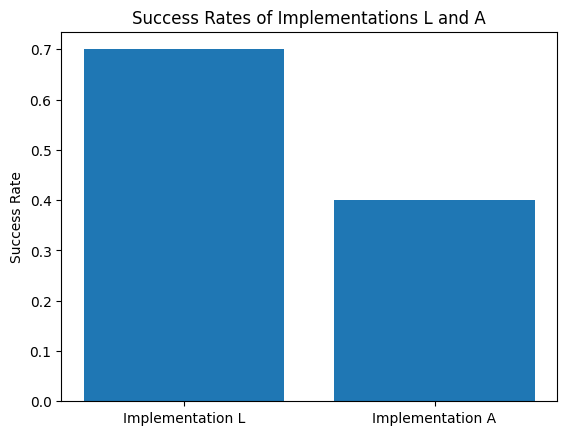

In [39]:
# Calculate success rates

# Here we are totally sure that all execution times below 90 seconds
# are successful because of the way the implementations are designed
success_rate_L = len(exec_timesL[exec_timesL < 90]) / len(exec_timesL)
success_rate_A = len(exec_timesA[exec_timesA < 90]) / len(exec_timesA)

# Plot success rates - easy visual comparison
plt.bar(['Implementation L', 'Implementation A'], [success_rate_L, success_rate_A])
plt.ylabel('Success Rate')
plt.title('Success Rates of Implementations L and A')
plt.show()

### Summarizing:

After performing a one-tailed z-test for the difference of two proportions, the results were a z-statistic of -4.26 and a p-value of approximately 0.00001. This provides strong statistical evidence suggesting that Implementation A has a lower success rate than Implementation L.


### Analyzing the normality assumptions:

#### Shapiro-Wilk Test for Normality:

To ensure the validity of my t-test in the first hypothesis, I needed to confirm that my data - the execution times for Implementation K, followed a normal distribution. For this, I used the Shapiro-Wilk test.

In this test, the null hypothesis states that the data was drawn from a normal distribution. I set the significance level at 0.05. If the resulting p-value from the test was greater than 0.05, we would not reject the null hypothesis, implying that the data does not significantly deviate from a normal distribution. However, if the p-value was less than 0.05, we would reject the null hypothesis, indicating that the data does not follow a normal distribution.

This normality check was vital to ensure the appropriateness of using a t-test, as t-tests assume normal distribution of data.

##### Test Result:
The Shapiro-Wilk test result indicated that our sample looks Gaussian, meaning we failed to reject the null hypothesis. Therefore, the t-test was an appropriate method for comparing the execution times.

<hr>

#### Binomial Assumption Check for Proportions:

In our second hypothesis, I was comparing success rates between Implementation A and L. Before performing a z-test for proportions, I needed to confirm the binomial assumption for these proportions.

For a binomial distribution to approximate a normal distribution (**central limit theorem**), the sample size needs to be large enough that both np and n(1-p) are greater than 5, where n is the sample size and p is the proportion of interest (here, the success rate). Satisfying this condition ensures that the binomial distribution of the data can be approximated by a normal distribution, which is a key assumption for the z-test.

Therefore, I performed a check to see if the product of the sample size and the success rate, and the product of the sample size and the failure rate, were both greater than 5 for Implementations A and L. This step was crucial for validating the use of a z-test in my analysis.

For Implementation A, I found that both np and n(1-p) were greater than 5, suggesting that the binomial assumption holds. Similarly for Implementation L, both np and n(1-p) were greater than 5, validating the binomial assumption. Thus, the use of a z-test was appropriate for my analysis.

##### Test Result:
We can conclude that the binomial assumption holds for both Implementations A and L. This validation confirms the appropriateness of the subsequent Z-test for comparing the success rates of these two implementations.

# Statistical Analysis Report (Summary)

## Hypothesis 1: Execution Times - Implementation A vs Implementation K

I first tried to determine whether Implementation A has significantly faster execution times than Implementation K. The null hypothesis for this test was stated as "Implementation A and Implementation K have the same execution times". The alternative hypothesis was "Implementation A has faster execution times than Implementation K".

I chose a paired t-test for this comparison, given that I had paired observations of execution times for the same tasks under two different conditions (Implementations A and K). The paired t-test compares the means of the paired observations, providing a direct way to see if there's a significant difference between them.

The t-test yielded a t-statistic of -21.20 and a one-tailed p-value of approximately 1.69e-19. Given that this p-value is significantly below the 0.05 threshold, I reject my null hypothesis. This provides strong statistical evidence to suggest that Implementation A has faster execution times than Implementation K. Hence, under the conditions of my test, I infer that Implementation A performs faster than Implementation K.

## Hypothesis 2: Success Rates - Implementation A vs Implementation L

The second part of my analysis focused on comparing the success rates of Implementation A and Implementation L. Given that I had a prior belief that Implementation A might have a lower success rate, I defined my null hypothesis as "Implementation A and Implementation L have the same success rates". The alternative hypothesis was "Implementation A has a lower success rate than Implementation L".

I performed a one-tailed z-test for proportions to test these hypotheses. The z-test was appropriate because I was comparing proportions (success rates), and it could effectively handle the large sample sizes that I had.

The z-test produced a z-statistic of -4.26 and a p-value of approximately 1.00e-05. As this p-value is significantly below the standard 0.05 threshold, I reject the null hypothesis, providing strong evidence that Implementation A has a lower success rate than Implementation L. This result aligns with my initial belief and confirms that, in terms of success rates, Implementation L outperforms Implementation A.

## Conclusion:

Through this statistical analysis, I have found significant differences in performance between the algorithm implementations, both in terms of execution times and success rates. These findings provide valuable insights for future development and optimization efforts of implementation A.